In [1]:
import dlib
import cv2
import imutils
import math

import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
predictor_path = 'shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(predictor_path)

face_detector = dlib.get_frontal_face_detector()

In [4]:
img_path = 'imgs/messi_2.jpg'
# img_path = 'imgs/messi_1.jpeg'

In [5]:
img: np.ndarray = dlib.load_rgb_image(img_path)

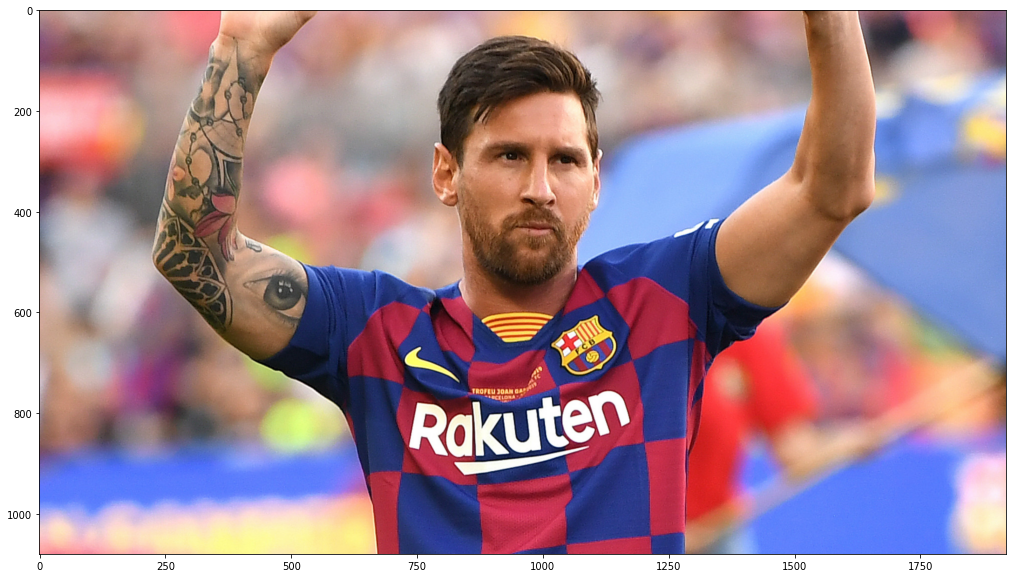

In [6]:
plt.imshow(img)
plt.show()

In [7]:
face_detector = dlib.get_frontal_face_detector()

In [8]:
mostacho = cv2.imread('imgs/mostacho.png', cv2.IMREAD_UNCHANGED)

In [9]:
detections = face_detector(img)

In [10]:
# img_to_show = img.copy()

size_offset = 50
alpha_img = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)

for detection in detections:
    x1, y1, x2, y2 = detection.left(), detection.top(), detection.right(), detection.bottom()
    
#     cv2.rectangle(img_to_show, (x1, y1), (x2, y2), (0, 255, 0), 10)
    
    landmarks = predictor(img, detection)
    landmarks_list = list(map(lambda p: (p.x, p.y), landmarks.parts()))
    
    # Centers
    y_position = (landmarks_list[51][1] + landmarks_list[33][1])//2
    x_position = landmarks_list[51][0]
    
    # Angle
    (xl, yt), (xr, yb) = landmarks_list[48], landmarks_list[54]
    xl -= size_offset
    xr += size_offset
#     angle = math.degrees(math.atan((yb-yt)/(xr-xl)))
    angle = math.degrees(math.atan((landmarks_list[2][1]-landmarks_list[14][1])/(landmarks_list[2][0]-landmarks_list[14][0])))
    
    # Rotate
    small_mostacho = imutils.resize(mostacho, width=xr - xl)
    small_mostacho = imutils.rotate_bound(small_mostacho, angle)
    # Alpha Channel
    alpha_s = small_mostacho[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s
    
    # Merge
    for c in range(3):
        left = x_position - small_mostacho.shape[1]//2
        right = left + small_mostacho.shape[1]

        top = y_position - small_mostacho.shape[0]//2
        bottom = top + small_mostacho.shape[0]

        alpha_img[top:bottom, left:right, c] = (alpha_s * small_mostacho[:, :, c] + 
                                                alpha_l * alpha_img[top:bottom, left:right, c])

(1080, 1920, 4)


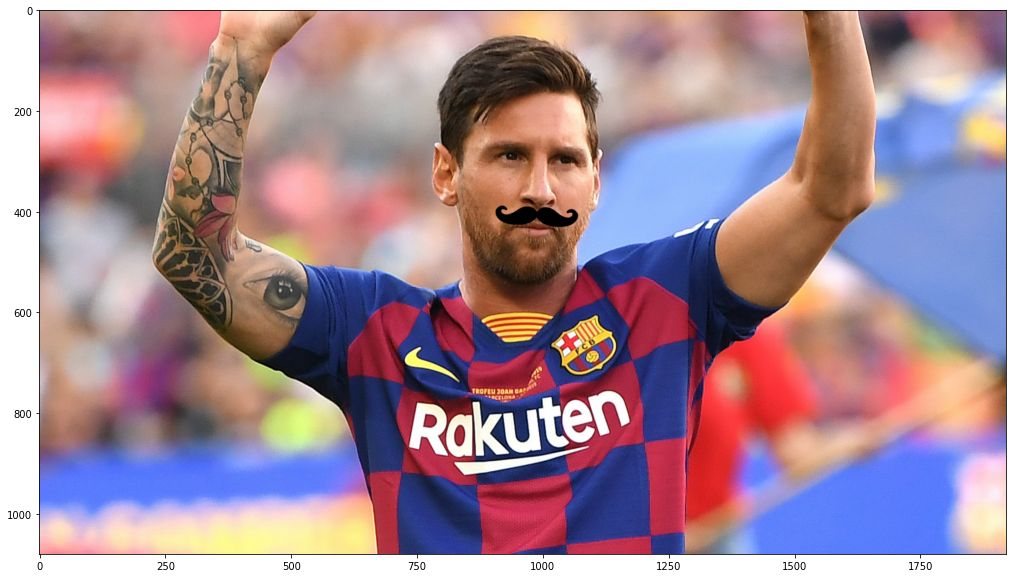

In [11]:
print(alpha_img.shape)
plt.imshow(alpha_img)
plt.show()